In [0]:
import numpy as np
import pandas as pd

# 1. Data Preparation
1. Assigned Final Features and Split Features and Results
2. Prepares Two Sets of Data for Prediction
3. Construct Training and Validation Indexes for Cross Validation

In [2]:
# Import original transformed data (unbalanced) and old training data index
original_d=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/training_dummy.csv')
old_set=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lending Club Project_Joint/training_sets_index.csv')
original_d.head()

,id,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,desc,inq_last_6mths,loan_amnt,num_bc_tl,mo_sin_rcnt_rev_tl_op,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_il_tl,num_op_rev_tl,num_sats,num_tl_op_past_12m,percent_bc_gt_75,tot_coll_amt,tot_cur_bal,total_acc,total_bal_ex_mort,pct_tl_nvr_dlq,verification_status_all,if_worse_rating,annual_inc_all,revol_bal_all,if_revol_delinq,if_cur_il,if_delinq_2yrs,if_pub_rec,if_pub_rec_bankruptcies,if_chargeoff_12_mths,if_collections_12_mths,mort_acc_all,num_rev_accts_all,dti_all,addr_state_AL,addr_state_AR,addr_state_AZ,...,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,results_Fully Paid
0,1294383,5.0,0.8115,0.5315,0,0,1.2,1.0,22,69,1,1,1,12,2,6,2,0.000,0.000,4.8690,16.0,4.8690,1.000,1,0,7.5,0.0685,0,0,0,0,0,0,0,0.0,2.0,0.2042,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1876502,0.0,0.2054,0.2069,0,0,0.5,4.0,50,50,2,3,2,0,3,3,0,0.500,0.000,0.6162,6.0,0.6162,1.000,0,0,2.5,0.6162,0,0,0,0,0,0,0,0.0,6.0,0.0797,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,954710,0.0,0.0631,0.0526,0,0,0.4,10.0,41,96,6,9,6,3,10,10,0,0.833,0.007,0.6312,18.0,0.6312,0.889,1,1,3.2,0.6312,1,0,0,0,0,0,0,0.0,15.0,0.1152,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,809314,7.0,2.9161,0.3000,0,0,1.0,5.0,7,12,1,12,5,11,12,18,4,1.000,0.000,52.4910,35.0,19.0254,0.830,1,1,13.5,1.4802,1,1,0,0,0,0,0,5.0,19.0,0.2366,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1069627,0.0,0.4674,0.7715,0,0,1.4,7.0,61,61,2,2,2,3,2,3,0,0.500,0.000,1.4021,16.0,1.4021,0.875,1,1,3.5,1.3385,1,0,0,0,0,0,0,3.0,9.0,0.1022,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
back_up=original_d.copy()

## 1.1 Assigned Final Features and Split Features and Results 

**Final Features:** 

  'term_ 60 months', 'acc_open_past_24mths', 'dti_all', 'total_acc', 'bc_open_to_buy', 'inq_last_6mths', 'home_ownership_RENT','loan_amnt', 'if_cur_il', 'percent_bc_gt_75', 'avg_cur_bal','verification_status_all', 'if_delinq_2yrs', 'purpose_credit_card','purpose_small_business', 'mort_acc_all', 'home_ownership_OWN'

In [0]:
# Split dependent variables and independent variables
X_train = original_d.loc[:,['term_ 60 months', 'acc_open_past_24mths',
                            'dti_all', 'total_acc', 'bc_open_to_buy',
                            'inq_last_6mths', 'home_ownership_RENT',
                            'loan_amnt', 'if_cur_il', 'percent_bc_gt_75',
                            'avg_cur_bal','verification_status_all',
                            'if_delinq_2yrs', 'purpose_credit_card',
                            'purpose_small_business', 'mort_acc_all',
                            'home_ownership_OWN']]

y_train = original_d.iloc[:,-1]

## 1.2 Prepare Two Sets of Data for Prediction
  The new_sets has the same observations as old_sets and it's balanced 
- Data set used to derive final features (Index: old_sets)
- Data set newly generated (Index: new_sets)

In [0]:
# Transform old_sets from dataframe to list
old_sets=list()
for i in range(5):
  old_sets.append(np.array(old_set.iloc[i,].dropna().astype(int)))

In [6]:
old_sets

[array([ 91022, 191017,  70630, ..., 140822, 112110, 159035]),
 array([248018, 307905, 231109, ..., 356897, 353748, 403616]),
 array([592380, 522196, 440446, ..., 440262, 476290, 446821]),
 array([806043, 825605, 724397, ..., 813870, 800119, 760516]),
 array([1005551,  999835,  998141, ...,  923349, 1025448,  900250])]

In [7]:
# Generate new data sets, e.g. randomize the index again
# This time, the random seed was set as 24. Steps shown below:

# Step 1: Seperate fully-paid and charged-off loans from the orignal dataset
fully_paid=original_d.loc[original_d['results_Fully Paid']==1,:]
charge_off=original_d.loc[original_d['results_Fully Paid']==0,:]

# Step 2: Break down the data into 5 sets for cross-validation.

fp=np.array_split(np.array(fully_paid.index),5) #fp: Fully-Paid
cf=np.array_split(np.array(charge_off.index),5) #cf: Charge-Off 

# Step 3: Random select from fully-paid sets

i = 0
print('Target Size: ',len(cf[0]))
for i in range(5):
  print('Set {}'.format(i+1))
  print('Before Sample: ',len(fp[i]))
  np.random.seed(24) # Randome seed is 24
  fp[i]=np.random.choice(fp[i],len(cf[0]))
  print('After Sample: ',len(fp[i]))

# Step 4: Merge both results, so they are equel weights

i = 0
new_sets=list()
for i in range(5):
  print('Set {}'.format(i+1))
  new_sets.append(np.concatenate((fp[i],cf[i]),axis=None))
  print('Set Size: ',len(new_sets[i]))

# Step 5: Shuffle the observations in the dataset for
# cross validation with a certain random seed
for i in range(5):
  np.random.seed(20+i)
  np.random.shuffle(new_sets[i])

Target Size:  42025
Set 1
Before Sample:  166993
After Sample:  42025
Set 2
Before Sample:  166993
After Sample:  42025
Set 3
Before Sample:  166993
After Sample:  42025
Set 4
Before Sample:  166992
After Sample:  42025
Set 5
Before Sample:  166992
After Sample:  42025
Set 1
Set Size:  84050
Set 2
Set Size:  84050
Set 3
Set Size:  84049
Set 4
Set Size:  84049
Set 5
Set Size:  84049


In [8]:
new_sets

[array([ 91022, 191017,  70630, ...,  94622,  10672, 108698]),
 array([417104, 266387, 231109, ..., 356897, 353748, 403616]),
 array([600119, 522196, 465440, ..., 459701, 595666, 489826]),
 array([765058, 825605, 724397, ..., 650180, 800119, 716235]),
 array([ 955676,  946701,  853853, ...,  923349, 1025448,  861136])]

In [9]:
# Check if the data are balanced
for i in range (5):
  print('New Set {}'.format(i+1))
  print(original_d.iloc[new_sets[i],:]['results_Fully Paid'].value_counts())

New Set 1
1    42025
0    42025
Name: results_Fully Paid, dtype: int64
New Set 2
1    42025
0    42025
Name: results_Fully Paid, dtype: int64
New Set 3
1    42025
0    42024
Name: results_Fully Paid, dtype: int64
New Set 4
1    42025
0    42024
Name: results_Fully Paid, dtype: int64
New Set 5
1    42025
0    42024
Name: results_Fully Paid, dtype: int64


## 1.3 Construct Training and Validation Indexes for Cross Validation
This same indexes are applied to both sets (new and old) as the indexes within both sets are different and the dimension of the sets are the same as well.

In [10]:
# Generate training and validating indexes within each sets
# It's ok to use the same index in new and old sets, as they are already randomized
# Split into training and validate data folds
# Set up the kfolds model in different sets
# So in total, we have 25 folds validating results
from sklearn.model_selection import StratifiedKFold

fold_train_index=list()
fold_validate_index=list()

for i in range(5):
  
  # The split doesn't randomize the data
  skf = StratifiedKFold(n_splits=5)
  skf.get_n_splits(X_train.iloc[old_sets[i],:],y_train[old_sets[i]])
  skf.split(X_train.iloc[old_sets[i],:],y_train[old_sets[i]])
  skf.get_n_splits(X_train.iloc[old_sets[i],:],y_train[old_sets[i]])
  print(skf)

  # n=1
  
  # Extracting the index of training and validating in each fold
  for train_index,validate_index in skf.split(X_train.iloc[old_sets[i],:],y_train[old_sets[i]]):
    # print('{}/5 Fold in Set {}'.format(n,i+1)) # print the progress
    fold_train_index.append(train_index)
    fold_validate_index.append(validate_index)
    # n+=1

  # print('Set {} Ends'.format(i+1)) # print the progress

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


#2. Model Construction and Prediction

1. Process:
This process will be seperately applied in the old data set and the new data set that prepared in 1.2 section.

  >Step 1: Define the Classifier, Logistic Regression

  >Step 2: Train the Model with Data in Train Folds

  >Step 3: Derive Coefficients for Features

  >Step 4: Predit Fully-Paid and Baseline Probability
    - Fully-Paid Probability in Validation Folds
    - Baseline Probability for the Model

2. Outcome
- Feature Coefficients in each model
- Fully-Paid Probability for each validation folds

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# prepare two datasets for storing feature coefficients
old_sets_coefficient=pd.DataFrame(index=range(25),columns=X_train.columns)
new_sets_coefficient=pd.DataFrame(index=range(25),columns=X_train.columns)

In [0]:
# The baseline application represents every column has zero value
baseline=pd.DataFrame(np.array([0]*17),index=X_train.columns).T

In [0]:
# For old data set
old_fully_paid_prob=list()
old_baseline_prob=list()

for i in range (5):
  for n in range(5):
    m=i*5+n
    # Step 1: Define the Classifier, Logistic Regression
    classifier = LogisticRegression(random_state=0,max_iter=2000000)
    
    # Step 2: Train the Model with Data in Train Folds
    classifier.fit(X_train.iloc[old_sets[i]].iloc[fold_train_index[m]],
               y_train.iloc[old_sets[i]].iloc[fold_train_index[m]])
    
    # Step 3: Derive Coefficients for Features
    old_sets_coefficient.iloc[m,:]=classifier.coef_

    # Step 4: Predit Fully-Paid Probability in Validation Folds and the baseline probability
    old_fully_paid_prob.append(classifier.predict_proba(X_train.iloc[old_sets[i]].iloc[fold_validate_index[m]])[:,1])
    old_baseline_prob.append(classifier.predict_proba(baseline)[:,1])

In [0]:
# For new data set
new_fully_paid_prob=list()
new_baseline_prob=list()

for i in range (5):
  for n in range(5):
    m=i*5+n
    # Step 1: Define the Classifier, Logistic Regression
    classifier = LogisticRegression(random_state=0,max_iter=2000000)
    
    # Step 2: Train the Model with Data in Train Folds
    classifier.fit(X_train.iloc[new_sets[i]].iloc[fold_train_index[m]],
               y_train.iloc[new_sets[i]].iloc[fold_train_index[m]])
    
    # Step 3: Derive Coefficients for Features
    new_sets_coefficient.iloc[m,:]=classifier.coef_

    # Step 4: Predit Fully-Paid Probability in Validation Folds
    new_fully_paid_prob.append(classifier.predict_proba(X_train.iloc[new_sets[i]].iloc[fold_validate_index[m]])[:,1])
    new_baseline_prob.append(classifier.predict_proba(baseline)[:,1])

In [0]:
# Convert old_fully_paid_prob & new_fully_paid_prob to dataframe
old_fully_paid_prob=pd.DataFrame(old_fully_paid_prob,index=range(1,26)).T
new_fully_paid_prob=pd.DataFrame(new_fully_paid_prob,index=range(1,26)).T

##1.3 Model Understanding
- **Baseline Probability:** Models built based on both data sets have the same baseline probability, 78%. This baseline probability represents a scenario that:
  > **Loan Information:** The loan is:
  - term_60_mths: a 30-month term loan
  - loan_amnt: 0 amount
  - purpose_scredit_card & purpose_small_business: the purpose of the loan is neither for credit card nor samll business
  
  > **Borrower's Credit History:** At the time of the applicaiton, the borrower:
   - dti_all: owns zero debt (weighted average between borrower and co-borrower)
   - acc_open_past_24_mths: opened no account in past 24 months
   - total_acc: no credit lines in borrower's current credit file
   - bc_open_to_buy: zero available credit to use (zero open-to-buy)
   - inq_last_6mths: no inquiry (exclude mortgage and auto) in past 6 months
   - if_cur_il: no current installment account
   - percent_bc_gt_75: no bank account's used credit greater than 75% of credit limit
   - avg_cur_bal: zero average current balance amount
   - if_delinq_2yrs: no delinquncy history in past 2 years
   - mort_acc_all: no mortage account (All borrowers)

   >**Borrower's Other Info:**
   - home_ownership_RENT & home_ownership_OWN: the borrower doesn't own nor rent the home
   - verification_status_all: borrower's income hasn't been verified (All borrowers)

- **Feature Impacts:** As we can see in below plot (titled: Old vs. New Coefficients), based on both data sets, the coefficent for each feature is similar, so we can conclude that the impact of each feature on fully-paid probability can be broadly applied to all the loans. Below shows features positive or negative impact the fully-paid probability.

  > **Positive Impact:** 'total_acc', 'bc_open_to_buy', 'avg_cur_bal', 'purpose_credit_card', 'mort_acc_all'

  > **Negative Impact:** 'term_ 60 months', 'acc_open_past_24mths', 'dti_all', 'inq_last_6mths', 'home_ownership_RENT', 'loan_amnt', 'if_cur_il', 'percent_bc_gt_75', 'verification_status_all', 'if_delinq_2yrs', 'purpose_small_business', 'home_ownership_OWN'

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<function matplotlib.pyplot.show>

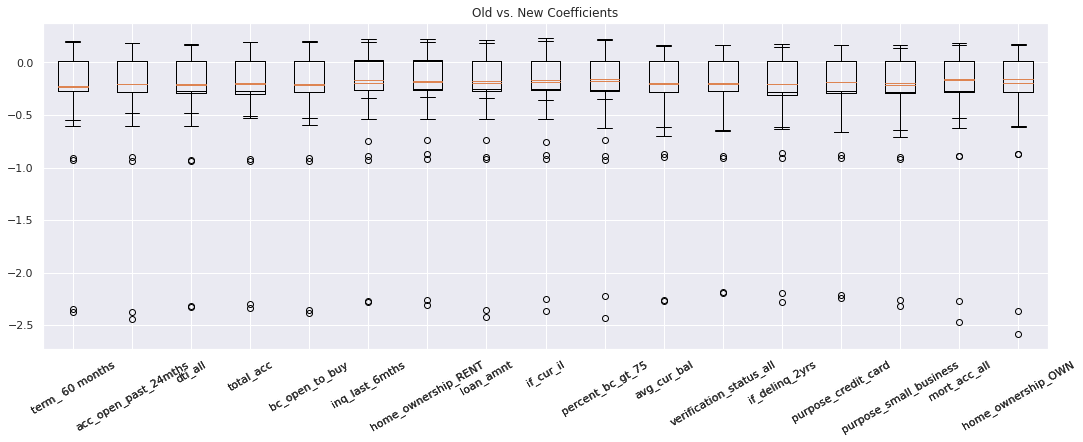

In [18]:
plt.figure(figsize=(18,6))
# Plot old sets coefficient
plt.boxplot(old_sets_coefficient, labels=old_sets_coefficient)
# Plot new sets coefficient
plt.boxplot(new_sets_coefficient, labels=new_sets_coefficient)
plt.title('Old vs. New Coefficients')
plt.xticks(rotation = 30)
plt.show

In [19]:
print('Old Positive Impact Features: ')
print(old_sets_coefficient.columns[old_sets_coefficient.mean()>0].values)
print('\n')
print('Old Negative Impact Features: ')
print(old_sets_coefficient.columns[old_sets_coefficient.mean()<0].values)

Old Positive Impact Features: 
['total_acc' 'bc_open_to_buy' 'avg_cur_bal' 'purpose_credit_card'
 'mort_acc_all']


Old Negative Impact Features: 
['term_ 60 months' 'acc_open_past_24mths' 'dti_all' 'inq_last_6mths'
 'home_ownership_RENT' 'loan_amnt' 'if_cur_il' 'percent_bc_gt_75'
 'verification_status_all' 'if_delinq_2yrs' 'purpose_small_business'
 'home_ownership_OWN']


In [20]:
print('New Positive Impact Features: ')
print(new_sets_coefficient.columns[new_sets_coefficient.mean()>0].values)
print('\n')
print('New Negative Impact Features: ')
print(new_sets_coefficient.columns[new_sets_coefficient.mean()<0].values)

New Positive Impact Features: 
['total_acc' 'bc_open_to_buy' 'avg_cur_bal' 'purpose_credit_card'
 'mort_acc_all']


New Negative Impact Features: 
['term_ 60 months' 'acc_open_past_24mths' 'dti_all' 'inq_last_6mths'
 'home_ownership_RENT' 'loan_amnt' 'if_cur_il' 'percent_bc_gt_75'
 'verification_status_all' 'if_delinq_2yrs' 'purpose_small_business'
 'home_ownership_OWN']


In [21]:
print( "Old Baseline Probability: %0.2f (+/- %0.2f)" % (pd.DataFrame(old_baseline_prob).mean(), 
                              pd.DataFrame(old_baseline_prob).std() * 2))
print( "New Baseline Probability: %0.2f (+/- %0.2f)" % (pd.DataFrame(new_baseline_prob).mean(), 
                              pd.DataFrame(new_baseline_prob).std() * 2))

Old Baseline Probability: 0.78 (+/- 0.01)
New Baseline Probability: 0.78 (+/- 0.01)


<function matplotlib.pyplot.show>

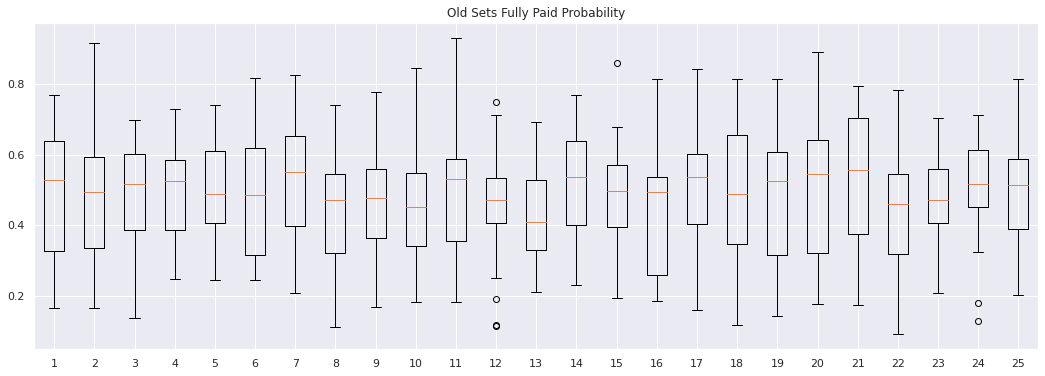

In [22]:
# Plot old sets Fully Paid Probability
plt.figure(figsize=(18,6))
plt.boxplot(old_fully_paid_prob,
            labels=old_fully_paid_prob)
plt.title('Old Sets Fully Paid Probability')
plt.show

<function matplotlib.pyplot.show>

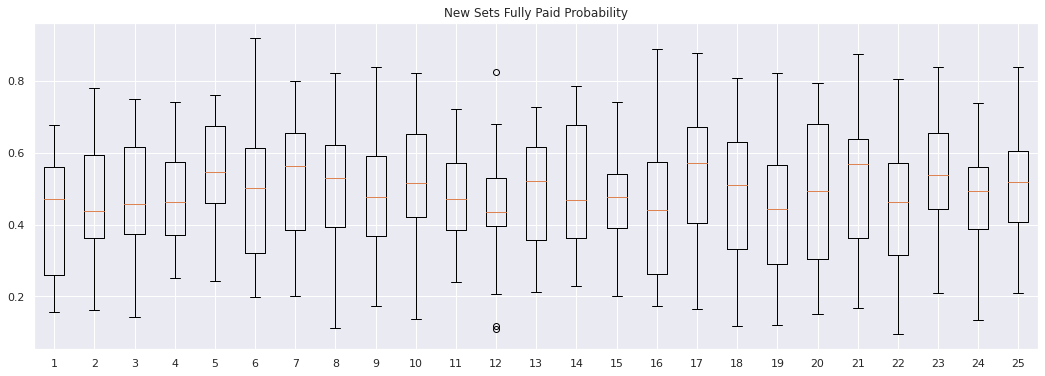

In [23]:
# Plot new sets Fully Paid Probability
plt.figure(figsize=(18,6))
plt.boxplot(new_fully_paid_prob,
            labels=new_fully_paid_prob)
plt.title('New Sets Fully Paid Probability')
plt.show

##1.4 Business Impact Analysis
1. Repayment Rate of the Loans
  - Calculate and Check the Repayment Rates
  - Convert Unreasonable Data to Reasonable Range

2. Analyze Repayment Rates on Different Grades
  - Classify Grades Based on the Fully-Paid Probability in both old dataset and new dataset
  - Repayment Rates Comparison


### 1.4.1 Repayment Rate of the Loans
>1. Calculate and Check Repayment Rates
Checking if the repayment rate is in the range of 0 to 1.
- Check if the repayment rates are in the reasonable range.
  - Negative Repayment Rate: 0
  - Greater than 1: 104
- Investigate the unreasonable loans.
  - Total_rec_prnp are 1 cent greater than loan_amnt, likely an data entry error
- Handle the repayment rate outside the reasonable range
  - Converting all the repayment rate greater than 1 to 1

>2. Convert unreasonable data to reasonal range
After convertion, all the repayment rate are in the range

In [0]:
training=pd.read_csv('/content/drive/My Drive/Lending Club/Final Data/training.csv', low_memory=False)

In [0]:
repayment_rate=training.total_rec_prncp/training.loan_amnt

In [26]:
# Checking if the repayment_rate is in the range of 0 and 1
print(' Negative Repayment Rate: ',sum(repayment_rate<0),
      '\n','Repayment Rate Greater than 1: ', sum(repayment_rate>1))

 Negative Repayment Rate:  0 
 Repayment Rate Greater than 1:  104


In [27]:
# Checking why the repayment rate is greater than 1 
# by exploring the data in relevant columns
training.loc[repayment_rate>1,['total_rec_prncp','loan_amnt','results','id']].head()

,total_rec_prncp,loan_amnt,results,id
7997,10000.01,10000,Fully Paid,2112923
8569,16000.01,16000,Fully Paid,2110668
10156,6250.01,6250,Fully Paid,2127375
10184,5000.01,5000,Fully Paid,2120599
12270,20000.01,20000,Fully Paid,2118567


In [0]:
# As all the unreasonable rates are beyond the upper bound
# To convert all the unreasonable rates to 1 in original dataset
repayment_rate[repayment_rate>1]=1

In [29]:
# Checking agian if the repayment_rate is in the range of 0 and 1
print(' Negative Repayment Rate: ',sum(repayment_rate<0),
      '\n','Repayment Rate Greater than 1: ', sum(repayment_rate>1))

 Negative Repayment Rate:  0 
 Repayment Rate Greater than 1:  0


In [0]:
training['repayment_rate']=repayment_rate

Repayment per Grades:
Grade   | Original   | New Sets | Old Sets
---     |   ---      |    ---   |   ---
**A**   | 0.963604   | 0.822118 | 0.822118
**B**   | 0.910177   | 0.844263 | 0.844263
**C**   | 0.838059   | 0.843298 | 0.843298
**D**   | 0.762764   | 0.844646 | 0.844646
**E**   | 0.690444   | 0.845629 | 0.845629
**F**   | 0.621071   | 0.843385 | 0.843385
**G**   | 0.577815   | 0.843655 | 0.843655
**Decline** |            | 0.834440 | 0.834440


###1.4.2 Analyze Repayment Rates on Different Grades
  - Classify Grades Based on the Fully-Paid Probability in both old dataset and new dataset
  - Repayment Rates Comparison
    - Overall Grades Repayment Rates
    - Old Datasets Grades Repayment Rates
    - New Datasets Grades Repayment Rates

The grades that we classified will be the same as the original grades used, and additional to the grades, we also include a declined category indicating the low fully paid probability. The grades and fully-paid probability are:
  - A [87.5%, 100%]
  - B [75%, 87.5%)
  - C [62.5%, 75%)
  - D [50%, 62.5%)
  - E [37.5%, 50)
  - F [25%, 37.5%)
  - G [12.5%, 25%)
  - Decline [0,12.5%)

As the result shows in below, the new grading based on the probability of fully paid doesn't yield a better repayment rate in each reclassed grades. The new grading doesn't defferentiate the credit risks, and this may be caused by:

1. The model need to be improved in terms of feature selection
2. Information availability, the original data set doesn't have credit score as original grading was built based on credit score.
3. Logistic regression is not the best way to make the classification, and other methods, such as random forest and SVM can be explored.

Repayment per Grades:
Grade   | Original   | New Sets | Old Sets
---     |   ---      |    ---   |   ---
**A**   | 0.963604   | 0.822118 | 0.822118
**B**   | 0.910177   | 0.844263 | 0.844263
**C**   | 0.838059   | 0.843298 | 0.843298
**D**   | 0.762764   | 0.844646 | 0.844646
**E**   | 0.690444   | 0.845629 | 0.845629
**F**   | 0.621071   | 0.843385 | 0.843385
**G**   | 0.577815   | 0.843655 | 0.843655
**Decline** |            | 0.834440 | 0.834440


In [45]:
old_sets

[array([ 91022, 191017,  70630, ..., 140822, 112110, 159035]),
 array([248018, 307905, 231109, ..., 356897, 353748, 403616]),
 array([592380, 522196, 440446, ..., 440262, 476290, 446821]),
 array([806043, 825605, 724397, ..., 813870, 800119, 760516]),
 array([1005551,  999835,  998141, ...,  923349, 1025448,  900250])]

In [32]:
new_sets

[array([ 91022, 191017,  70630, ...,  94622,  10672, 108698]),
 array([417104, 266387, 231109, ..., 356897, 353748, 403616]),
 array([600119, 522196, 465440, ..., 459701, 595666, 489826]),
 array([765058, 825605, 724397, ..., 650180, 800119, 716235]),
 array([ 955676,  946701,  853853, ...,  923349, 1025448,  861136])]

In [0]:
# Old data sets
A_old=list()
B_old=list()
C_old=list()
D_old=list()
E_old=list()
F_old=list()
G_old=list()
Decline_old=list()
for i in range(1,26):
  A_old.append(np.where(old_fully_paid_prob.loc[:,i]>=0.875))
  B_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.75) & (old_fully_paid_prob.loc[:,i]<0.875)))
  C_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.625) & (old_fully_paid_prob.loc[:,i]<0.75)))
  D_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.5) & (old_fully_paid_prob.loc[:,i]<0.625)))
  E_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.375) & (old_fully_paid_prob.loc[:,i]<0.5)))
  F_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.25) & (old_fully_paid_prob.loc[:,i]<0.375)))
  G_old.append(np.where((old_fully_paid_prob.loc[:,i]>=0.125) & (old_fully_paid_prob.loc[:,i]<0.25)))
  Decline_old.append(np.where(old_fully_paid_prob.loc[:,i]<0.125))

new_grades_old=pd.DataFrame(index=old_fully_paid_prob.index,columns=old_fully_paid_prob.columns)
for i in range(1,26):
  new_grades_old.loc[:,i].iloc[A_old[i-1]]='A'
  new_grades_old.loc[:,i].iloc[B_old[i-1]]='B'
  new_grades_old.loc[:,i].iloc[C_old[i-1]]='C'
  new_grades_old.loc[:,i].iloc[D_old[i-1]]='D'
  new_grades_old.loc[:,i].iloc[E_old[i-1]]='E'
  new_grades_old.loc[:,i].iloc[F_old[i-1]]='F'
  new_grades_old.loc[:,i].iloc[G_old[i-1]]='G'
  new_grades_old.loc[:,i].iloc[Decline_old[i-1]]='Decline'

In [0]:
# New data sets
A_new=list()
B_new=list()
C_new=list()
D_new=list()
E_new=list()
F_new=list()
G_new=list()
Decline_new=list()
for i in range(1,26):
  A_new.append(np.where(new_fully_paid_prob.loc[:,i]>=0.875))
  B_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.75) & (new_fully_paid_prob.loc[:,i]<0.875)))
  C_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.625) & (new_fully_paid_prob.loc[:,i]<0.75)))
  D_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.5) & (new_fully_paid_prob.loc[:,i]<0.625)))
  E_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.375) & (new_fully_paid_prob.loc[:,i]<0.5)))
  F_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.25) & (new_fully_paid_prob.loc[:,i]<0.375)))
  G_new.append(np.where((new_fully_paid_prob.loc[:,i]>=0.125) & (new_fully_paid_prob.loc[:,i]<0.25)))
  Decline_new.append(np.where(new_fully_paid_prob.loc[:,i]<0.125))

new_grades_new=pd.DataFrame(index=new_fully_paid_prob.index,columns=new_fully_paid_prob.columns)
for i in range(1,26):
  new_grades_new.loc[:,i].iloc[A_new[i-1]]='A'
  new_grades_new.loc[:,i].iloc[B_new[i-1]]='B'
  new_grades_new.loc[:,i].iloc[C_new[i-1]]='C'
  new_grades_new.loc[:,i].iloc[D_new[i-1]]='D'
  new_grades_new.loc[:,i].iloc[E_new[i-1]]='E'
  new_grades_new.loc[:,i].iloc[F_new[i-1]]='F'
  new_grades_new.loc[:,i].iloc[G_new[i-1]]='G'
  new_grades_new.loc[:,i].iloc[Decline_new[i-1]]='Decline'

In [0]:
repayment_rate_new_grade=pd.DataFrame()

for i in range(5):
  for n in range(5):
    m=i*5+n
    # Repayment Rate for Each Grade
    
    # Old total received principle
    total_principle_repaid_old=training.iloc[old_sets[i]].iloc[fold_validate_index[m]].loc[:,['total_rec_prncp']]
    total_principle_repaid_old.loc[:,'new_grades_old']=list(new_grades_old[m+1].dropna())
    total_principle_repaid_old=total_principle_repaid_old.groupby(by='new_grades_old').sum().total_rec_prncp

    # Old total loan amount
    total_loan_amount_old=training.iloc[old_sets[i]].iloc[fold_validate_index[m]].loc[:,['loan_amnt']]
    total_loan_amount_old.loc[:,'new_grade_old']=list(new_grades_old[m+1].dropna())
    total_loan_amount_old=total_loan_amount_old.groupby(by='new_grade_old').sum().loan_amnt

    set_repayment_rate=total_principle_repaid_old/total_loan_amount_old

    repayment_rate_new_grade[m]=set_repayment_rate

repayment_rate_new_grade=repayment_rate_new_grade.T

In [42]:
repayment_rate_new_grade

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
new_grades_new,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.807680,0.724329,0.814330,0.886121,0.783925,0.869057,0.836115,0.813517,0.836514,0.868902,0.860780,0.853970,0.845501,0.784273,0.787079,0.731874,0.885750,0.856656,0.859234,0.801237,0.785727,0.790511,0.833841,0.792697,0.843336
B,0.828205,0.834047,0.858159,0.832567,0.858926,0.840676,0.813272,0.848629,0.860171,0.848056,0.844979,0.857517,0.824960,0.836589,0.868324,0.860031,0.831646,0.839796,0.846275,0.852627,0.834626,0.822652,0.846234,0.852231,0.865372
C,0.844630,0.844302,0.832886,0.831166,0.838478,0.841215,0.844697,0.844078,0.848003,0.841904,0.837600,0.828473,0.848886,0.839313,0.844589,0.861725,0.846796,0.841552,0.841537,0.850875,0.828596,0.848806,0.840904,0.854063,0.857389
D,0.849350,0.845256,0.848048,0.844390,0.839208,0.846643,0.837979,0.842525,0.844003,0.847968,0.840137,0.852198,0.840666,0.838768,0.836894,0.836943,0.856877,0.841118,0.846409,0.840959,0.845608,0.851760,0.840760,0.848258,0.853434
Decline,0.749093,0.860046,0.803992,0.810784,0.915813,0.942246,0.778976,0.789643,0.779824,0.839926,0.870376,0.835114,0.847104,0.841098,0.798577,0.860298,0.818646,0.936889,0.751562,0.830226,0.835136,0.849703,0.795446,0.863463,0.857009
E,0.851049,0.843256,0.842765,0.840076,0.849151,0.854804,0.849734,0.842364,0.855253,0.847065,0.843571,0.840098,0.838233,0.849822,0.840164,0.842174,0.856029,0.844489,0.837903,0.847013,0.844448,0.837267,0.847736,0.844101,0.852149
F,0.843462,0.842369,0.836527,0.846064,0.847825,0.833571,0.850827,0.848008,0.840451,0.834033,0.855759,0.848604,0.842590,0.841329,0.849940,0.844802,0.852656,0.837979,0.839655,0.842349,0.834123,0.843296,0.836769,0.857065,0.834582
G,0.838342,0.833120,0.859329,0.845324,0.844186,0.843236,0.842485,0.834504,0.835502,0.861374,0.841940,0.830580,0.827552,0.829474,0.828879,0.849558,0.856251,0.851409,0.867348,0.833947,0.841063,0.830837,0.856500,0.848352,0.860289


In [44]:
repayment_rate_new_grade.T.mean()

new_grades_new
A          0.822118
B          0.844263
C          0.843298
D          0.844646
Decline    0.834440
E          0.845629
F          0.843385
G          0.843655
dtype: float64

In [40]:
repayment_rate_original_grade=pd.DataFrame()

for i in range(5):
  for n in range(5):
    m=i*5+n
    # Repayment Rate for Each Grade
    
    # Old total received principle
    total_principle_repaid=training.iloc[old_sets[i]].iloc[fold_validate_index[m]].loc[:,['total_rec_prncp','grade']]
    # total_principle_repaid.loc[:,'new_grades_old']=list(new_grades_old[m+1].dropna())
    total_principle_repaid=total_principle_repaid.groupby(by='grade').sum().total_rec_prncp

    # Old total loan amount
    total_loan_amount=training.iloc[old_sets[i]].iloc[fold_validate_index[m]].loc[:,['loan_amnt','grade']]
    # total_loan_amount.loc[:,'new_grade_old']=list(new_grades_old[m+1].dropna())
    total_loan_amount=total_loan_amount.groupby(by='grade').sum().loan_amnt

    set_repayment_rate=total_principle_repaid/total_loan_amount

    repayment_rate_original_grade[m]=set_repayment_rate

repayment_rate_original_grade.T.mean()

grade
A    0.963604
B    0.910177
C    0.838059
D    0.762764
E    0.690444
F    0.621071
G    0.577815
dtype: float64

In [0]:
repayment_rate_new_grade=pd.DataFrame()

for i in range(5):
  for n in range(5):
    m=i*5+n
    # Repayment Rate for Each Grade
    
    # New total received principle
    total_principle_repaid=training.iloc[new_sets[i]].iloc[fold_validate_index[m]].loc[:,['total_rec_prncp']]
    total_principle_repaid.loc[:,'new_grades_new']=list(new_grades_new[m+1].dropna())
    total_principle_repaid=total_principle_repaid.groupby(by='new_grades_new').sum().total_rec_prncp

    # Old total loan amount
    total_loan_amount=training.iloc[new_sets[i]].iloc[fold_validate_index[m]].loc[:,['loan_amnt']]
    total_loan_amount.loc[:,'new_grades_new']=list(new_grades_new[m+1].dropna())
    total_loan_amount=total_loan_amount.groupby(by='new_grades_new').sum().loan_amnt

    set_repayment_rate=total_principle_repaid/total_loan_amount

    repayment_rate_new_grade[m]=set_repayment_rate

repayment_rate_new_grade.T.mean()

In [47]:
repayment_rate_new_grade.T.mean()

new_grades_new
A          0.822118
B          0.844263
C          0.843298
D          0.844646
Decline    0.834440
E          0.845629
F          0.843385
G          0.843655
dtype: float64